# UoG-DA_Group28 Jupyter Notebook: Classification - K-Nearest Neighbour (KNN)

<hr>

## <u> Initial Setup </u>

In [1]:
from utils import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load the Datasets
dataset_1 = load_from_pickle("cir_ncir_agg.pkl", "./pickled_data_sets")
dataset_2 = load_from_pickle("cir_ncir_pca.pkl", "./pickled_data_sets")

## <u> Training and Analysis </u>

### <b> Dataset: cir_ncir_agg </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [2]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the K Neighbout model based on several `n_neighbors` for both 70:30 and 80:20 dataset splits in order to obtain the most optimal results

Other parameters will follow the defaults provided in previous lab exercises:

- `metric` : `minkowski` Minikowski Distance
- `p` : `2` Minikowski P order to derive Euclidean Distance 

Number of Nearest Neighbours:  1
Training Accuracy:  1.0
Testing Accuracy:  0.7434920634920635
Number of Nearest Neighbours:  5
Training Accuracy:  0.8469727891156462
Testing Accuracy:  0.7761904761904762
Number of Nearest Neighbours:  10
Training Accuracy:  0.8189115646258504
Testing Accuracy:  0.7892063492063492
Number of Nearest Neighbours:  15
Training Accuracy:  0.8148639455782313
Testing Accuracy:  0.7906349206349207
Number of Nearest Neighbours:  20
Training Accuracy:  0.807108843537415
Testing Accuracy:  0.7922222222222223
Number of Nearest Neighbours:  25
Training Accuracy:  0.8076190476190476
Testing Accuracy:  0.7933333333333333
Number of Nearest Neighbours:  30
Training Accuracy:  0.8020748299319728
Testing Accuracy:  0.7947619047619048
Number of Nearest Neighbours:  35
Training Accuracy:  0.8017006802721088
Testing Accuracy:  0.7942857142857143
Number of Nearest Neighbours:  40
Training Accuracy:  0.8002721088435374
Testing Accuracy:  0.7957936507936508
Number of Nearest N

Text(0, 0.5, 'Accuracy')

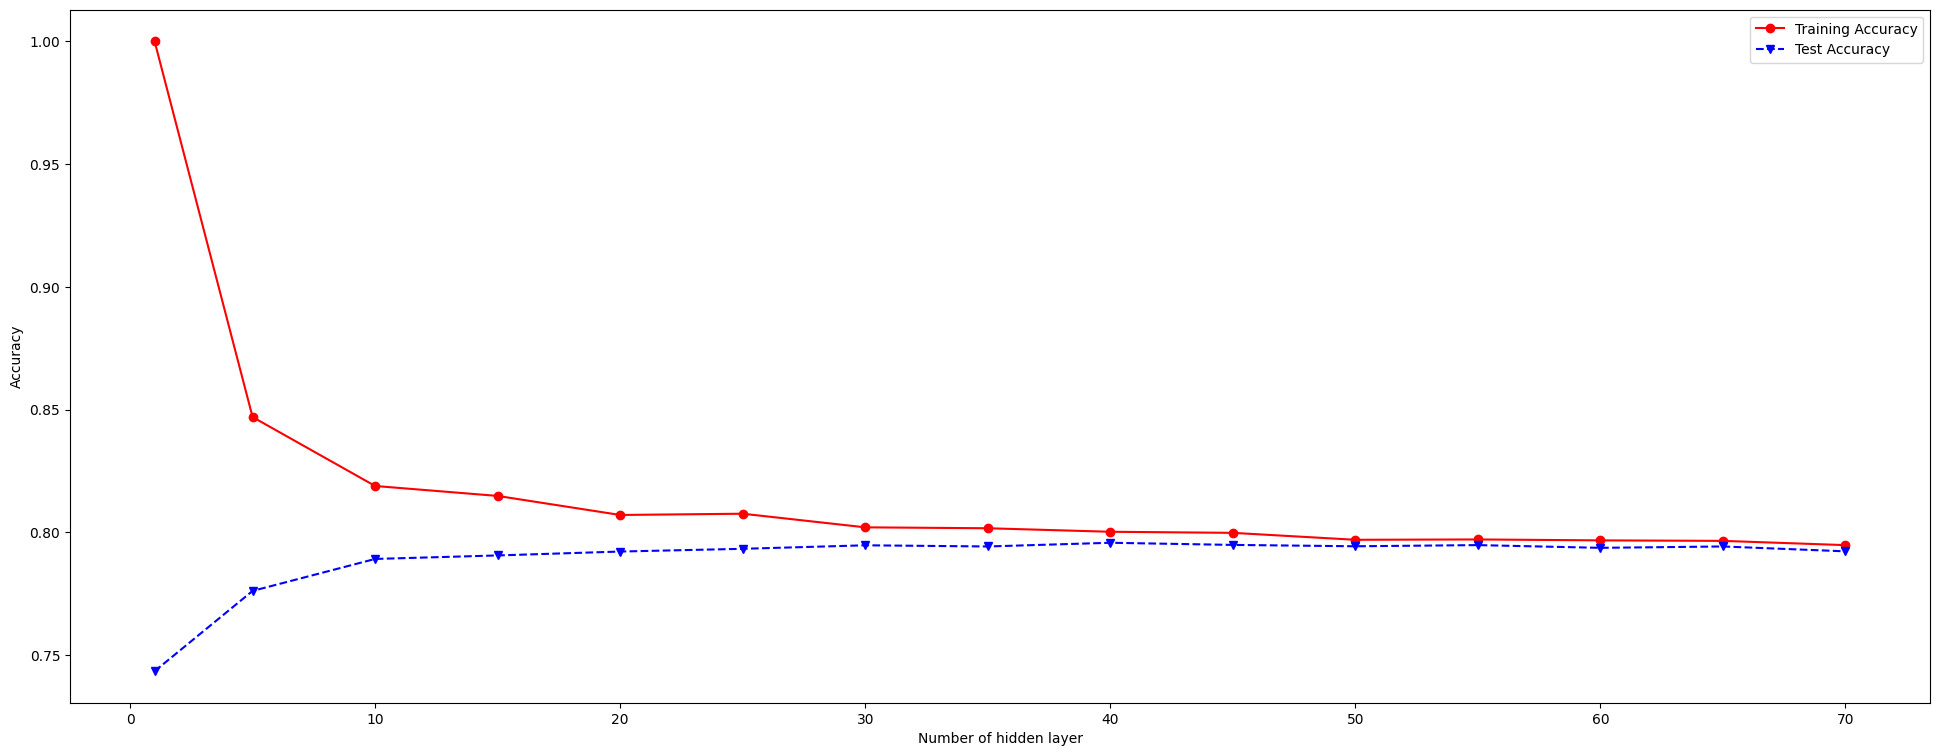

In [3]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAcc.append(accuracy_score(Y_train_70_30, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_70_30, Y_predTest))
    print("Number of Nearest Neighbours: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

Number of Nearest Neighbours:  1
Training Accuracy:  1.0
Testing Accuracy:  0.736547619047619
Number of Nearest Neighbours:  5
Training Accuracy:  0.8498511904761905
Testing Accuracy:  0.7723809523809524
Number of Nearest Neighbours:  10
Training Accuracy:  0.8203869047619048
Testing Accuracy:  0.7919047619047619
Number of Nearest Neighbours:  15
Training Accuracy:  0.8144345238095239
Testing Accuracy:  0.7932142857142858
Number of Nearest Neighbours:  20
Training Accuracy:  0.8085714285714286
Testing Accuracy:  0.7938095238095239
Number of Nearest Neighbours:  25
Training Accuracy:  0.807172619047619
Testing Accuracy:  0.794404761904762
Number of Nearest Neighbours:  30
Training Accuracy:  0.8046130952380952
Testing Accuracy:  0.7967857142857143
Number of Nearest Neighbours:  35
Training Accuracy:  0.8033035714285715
Testing Accuracy:  0.7953571428571429
Number of Nearest Neighbours:  40
Training Accuracy:  0.8012202380952381
Testing Accuracy:  0.7946428571428571
Number of Nearest Nei

Text(0, 0.5, 'Accuracy')

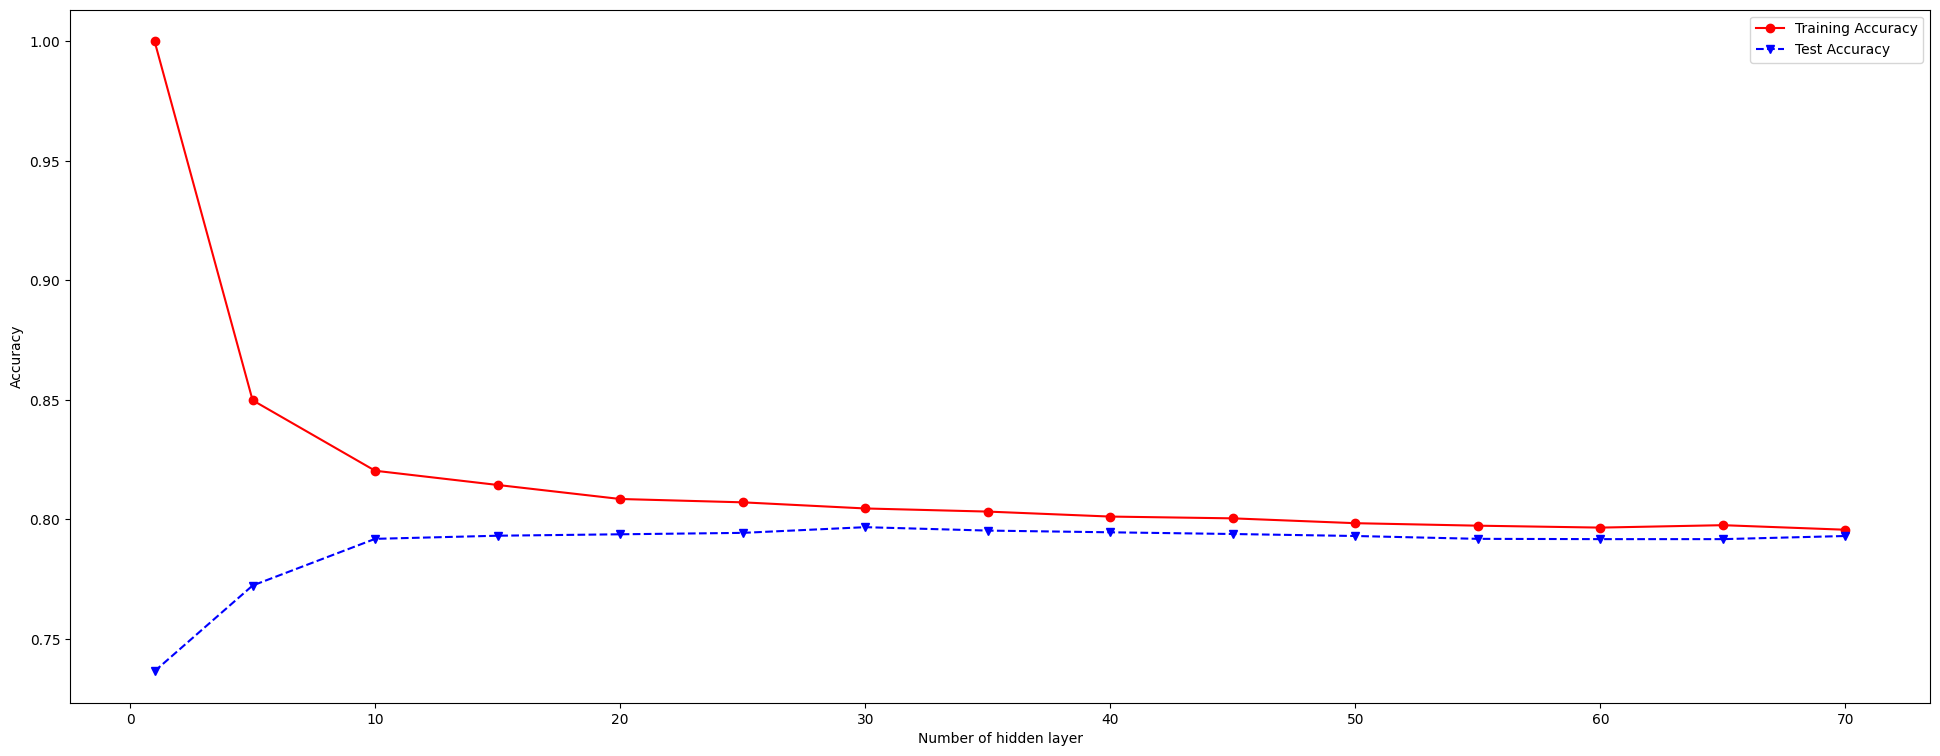

In [4]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAcc.append(accuracy_score(Y_train_80_20, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_80_20, Y_predTest))
    print("Number of Nearest Neighbours: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From the 70:30 and 80:20 splits, we can observe gradual convergence for both 'Training Accuracy' and 'Test Accuracy', with the `numNeighbors` that produces higher 'Test Accuracy' scores being `40` for the 70:30 split and `30` for the 80:20
- `n_neighbors` : `40`, `30`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [5]:
k = 40

clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Number of Nearest Neighbours: ", k)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

Number of Nearest Neighbours:  40
Training Accuracy:  0.8002721088435374
Testing Accuracy:  0.7957936507936508


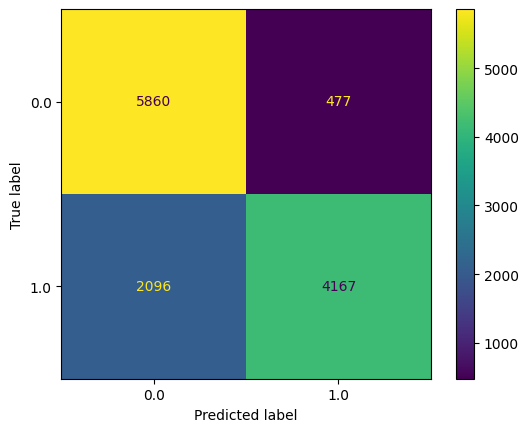

              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82      6337
         1.0       0.90      0.67      0.76      6263

    accuracy                           0.80     12600
   macro avg       0.82      0.80      0.79     12600
weighted avg       0.82      0.80      0.79     12600



In [6]:
predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [7]:
k = 30

clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Number of Nearest Neighbours: ", k)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

Number of Nearest Neighbours:  30
Training Accuracy:  0.8046130952380952
Testing Accuracy:  0.7967857142857143


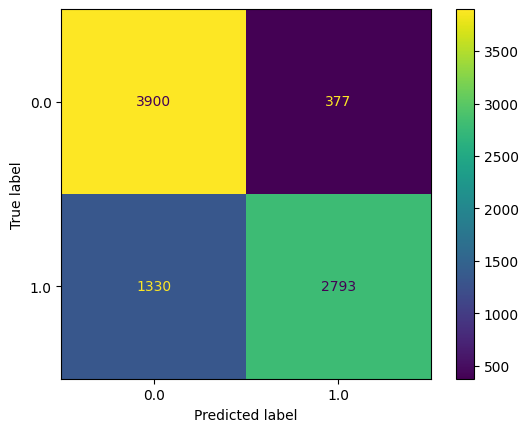

              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82      4277
         1.0       0.88      0.68      0.77      4123

    accuracy                           0.80      8400
   macro avg       0.81      0.79      0.79      8400
weighted avg       0.81      0.80      0.79      8400



In [8]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

### <b> Dataset: cir_ncir_pca </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [9]:
# Select the features to be used for Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the K Neighbout model based on several `n_neighbors` for both 70:30 and 80:20 dataset splits in order to obtain the most optimal results

Other parameters will follow the defaults provided in previous lab exercises:

- `metric` : `minkowski` Minikowski Distance
- `p` : `2` Minikowski P order to derive Euclidean Distance 

Number of Nearest Neighbours:  1
Training Accuracy:  1.0
Testing Accuracy:  0.7189682539682539
Number of Nearest Neighbours:  5
Training Accuracy:  0.8456122448979592
Testing Accuracy:  0.7683333333333333
Number of Nearest Neighbours:  10
Training Accuracy:  0.8172789115646258
Testing Accuracy:  0.7857936507936508
Number of Nearest Neighbours:  15
Training Accuracy:  0.815
Testing Accuracy:  0.7867460317460317
Number of Nearest Neighbours:  20
Training Accuracy:  0.8092857142857143
Testing Accuracy:  0.7888888888888889
Number of Nearest Neighbours:  25
Training Accuracy:  0.8080952380952381
Testing Accuracy:  0.7898412698412698
Number of Nearest Neighbours:  30
Training Accuracy:  0.806156462585034
Testing Accuracy:  0.7902380952380952
Number of Nearest Neighbours:  35
Training Accuracy:  0.804625850340136
Testing Accuracy:  0.7903174603174603
Number of Nearest Neighbours:  40
Training Accuracy:  0.8025510204081633
Testing Accuracy:  0.7921428571428571
Number of Nearest Neighbours:  45

Text(0, 0.5, 'Accuracy')

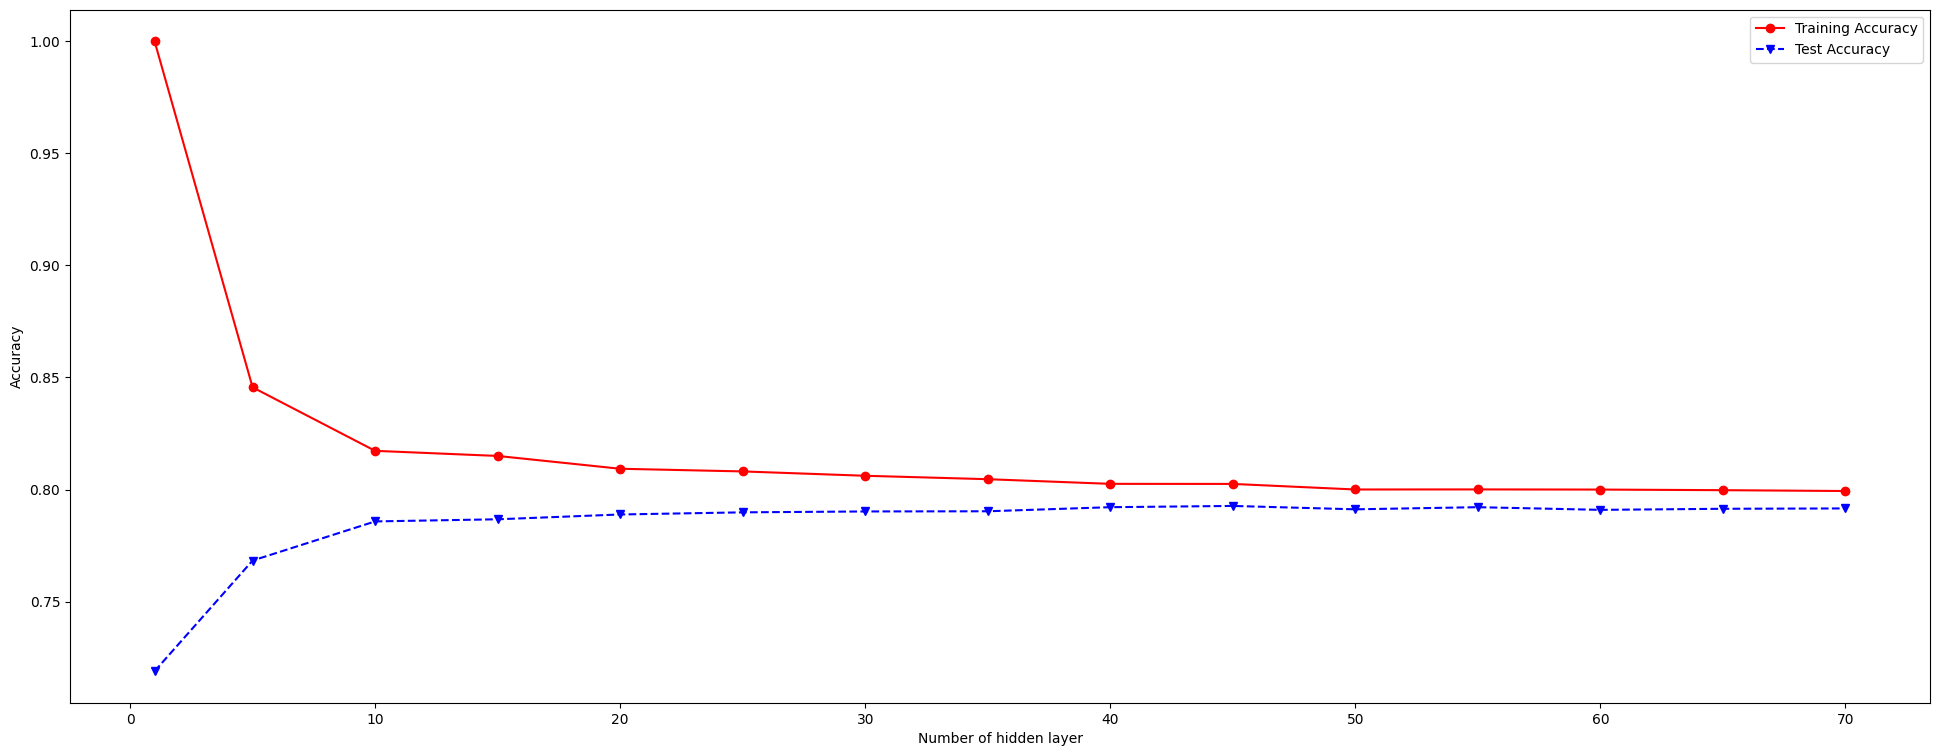

In [10]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAcc.append(accuracy_score(Y_train_70_30, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_70_30, Y_predTest))
    print("Number of Nearest Neighbours: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

We will first look to train and plot the K Neighbout model based on several `n_neighbors` for both 70:30 and 80:20 dataset splits in order to obtain the most optimal results

Other parameters will follow the defaults provided in previous lab exercises:

- `metric` : `minkowski` Minikowski Distance
- `p` : `2` Minikowski P order to derive Euclidean Distance 

Number of Nearest Neighbours:  1
Training Accuracy:  1.0
Testing Accuracy:  0.7220238095238095
Number of Nearest Neighbours:  5
Training Accuracy:  0.8437202380952381
Testing Accuracy:  0.7710714285714285
Number of Nearest Neighbours:  10
Training Accuracy:  0.817797619047619
Testing Accuracy:  0.785952380952381
Number of Nearest Neighbours:  15
Training Accuracy:  0.8145833333333333
Testing Accuracy:  0.7860714285714285
Number of Nearest Neighbours:  20
Training Accuracy:  0.8091964285714286
Testing Accuracy:  0.7907142857142857
Number of Nearest Neighbours:  25
Training Accuracy:  0.8080952380952381
Testing Accuracy:  0.7879761904761905
Number of Nearest Neighbours:  30
Training Accuracy:  0.8051190476190476
Testing Accuracy:  0.7913095238095238
Number of Nearest Neighbours:  35
Training Accuracy:  0.8055059523809524
Testing Accuracy:  0.7896428571428571
Number of Nearest Neighbours:  40
Training Accuracy:  0.8027083333333334
Testing Accuracy:  0.79
Number of Nearest Neighbours:  45


Text(0, 0.5, 'Accuracy')

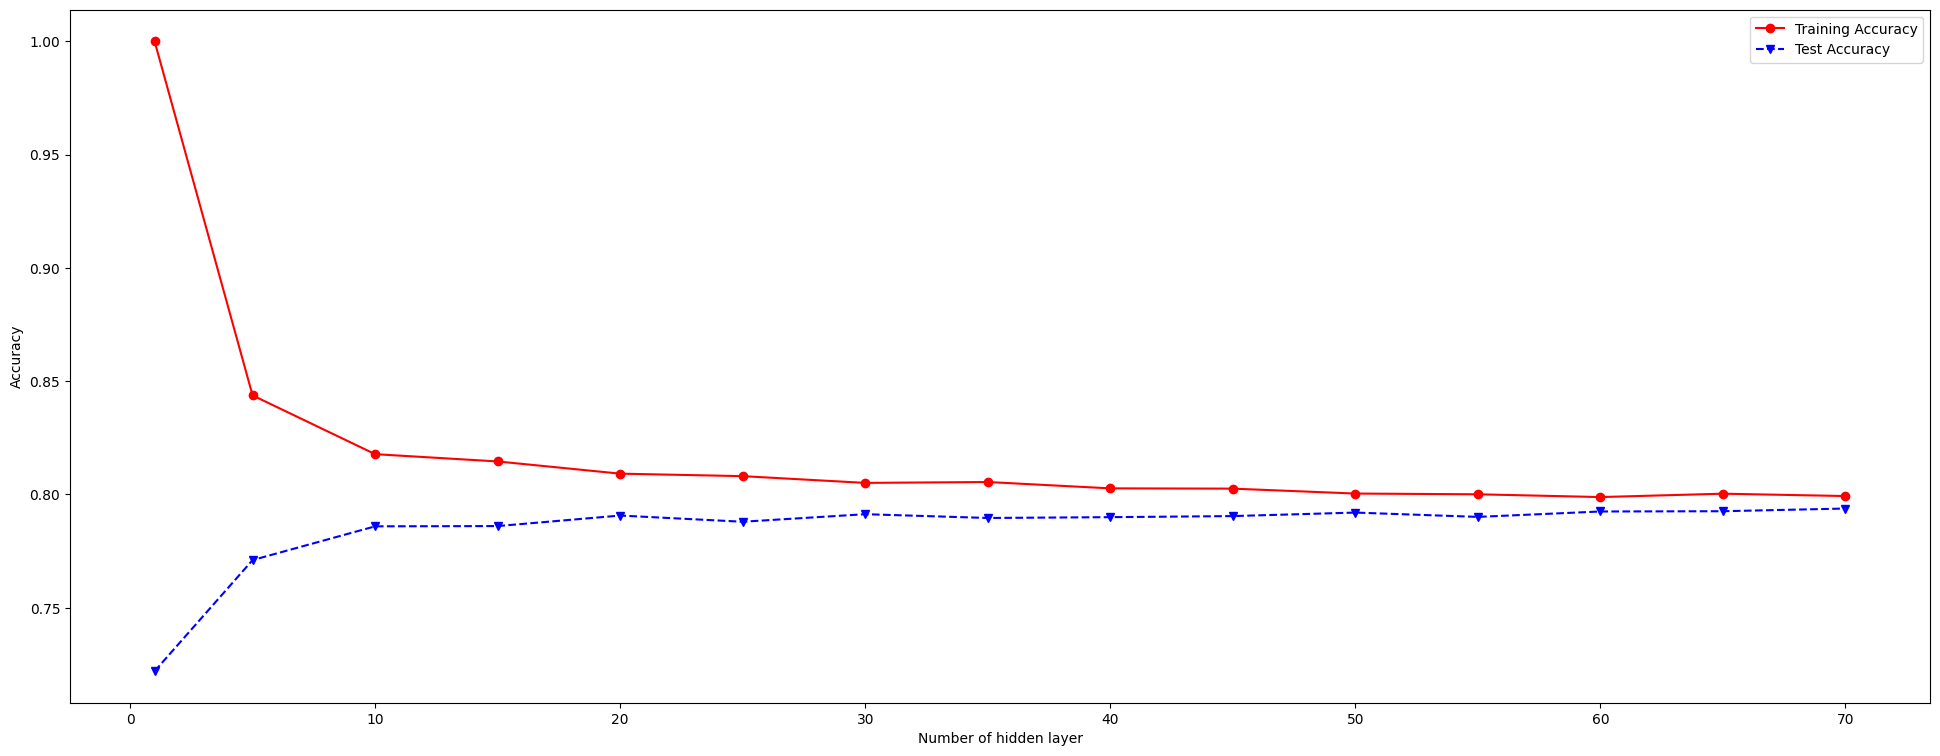

In [11]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAcc.append(accuracy_score(Y_train_80_20, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_80_20, Y_predTest))
    print("Number of Nearest Neighbours: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From the 70:30 and 80:20 splits, we can observe gradual convergence for both 'Training Accuracy' and 'Test Accuracy', with fluctuating convergence from the `numNeighbors` = 20 onwards, with the `numNeighbors` that produces higher 'Test Accuracy' scores being `45` for the 70:30 split and `70` for the 80:20
- `n_neighbors` : `45`, `70`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [12]:
k = 45

clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Number of Nearest Neighbours: ", k)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

Number of Nearest Neighbours:  45
Training Accuracy:  0.8025170068027211
Testing Accuracy:  0.7926984126984127


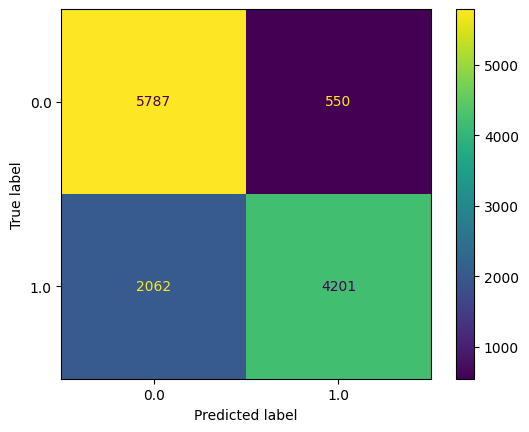

              precision    recall  f1-score   support

         0.0       0.74      0.91      0.82      6337
         1.0       0.88      0.67      0.76      6263

    accuracy                           0.79     12600
   macro avg       0.81      0.79      0.79     12600
weighted avg       0.81      0.79      0.79     12600



In [13]:
predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [14]:
k = 70

clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Number of Nearest Neighbours: ", k)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

Number of Nearest Neighbours:  70
Training Accuracy:  0.7993154761904762
Testing Accuracy:  0.7938095238095239


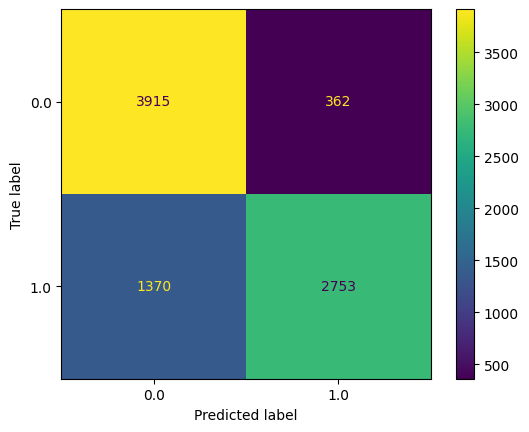

              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82      4277
         1.0       0.88      0.67      0.76      4123

    accuracy                           0.79      8400
   macro avg       0.81      0.79      0.79      8400
weighted avg       0.81      0.79      0.79      8400



In [15]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

#### Conclusion

We are going to select the model trained with the '80:20 training:testing split cir_ncir_agg' dataset with a 'n_neighbors = 60' as it provides us with the (marginally) highest training and testing accuracy. This model will be saved to a pickle file for later usage.

In [21]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

k = 30

clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("KNN trained with cir_ncir_pca_80_20:")
print("-------------------------------")
print("Number of Nearest Neighbours: ", k)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
print("\n")

save_to_pickle('knn_cir_ncir_agg_80_20', './pickled_models' , clf)

KNN trained with cir_ncir_pca_80_20:
-------------------------------
Number of Nearest Neighbours:  30
Training Accuracy:  0.8046130952380952
Testing Accuracy:  0.7967857142857143




<hr>

# <u> References </u>

[1] Google. (n.d.). Classification: Accuracy, recall, precision, and related metrics. Google. https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall (accessed Mar. 16, 2025) <br>
[2] Hyperskill. (n.d.). https://hyperskill.org/learn/step/29339 (accessed Mar. 16, 2025) <br>
